## This notebook is come after 
Sklearn learn/Regression/Linear Models/Logistic Regression/phyblass-logis-reg.ipynb
please read it first

## $$ z = \dfrac{x_i - \mu}{\sigma}$$
This is the idea of **Data normalization** in stats

### *But* <b style='color:red'> normalization $ \ne $ standardization

# Standardize by ***Numpy***

In [128]:
import numpy as np
x = np.array([5, 2, 8, 4, 10])
z = x_stands = ( x - x.mean()) / x.std()
print('Mean_z : {:.2f}'.format(z.mean()))
print('Std_z : {:.2f}'.format(z.std()))
print('Z : {}' .format(z.round(2)))

Mean_z : 0.00
Std_z : 1.00
Z : [-0.28 -1.33  0.77 -0.63  1.47]


### In reality we generally encounter **Multi-variable**
so it's good to know how to *zip/ stack* data together

In [129]:
x = np.random.normal(8, 5, 5).round(0)
y = np.random.normal(950, 50, len(x)).round(0)
# features = np.column_stack([x, y])
features = np.stack([x, y], axis=1)
print(features[:])

[[1.100e+01 9.640e+02]
 [1.200e+01 9.310e+02]
 [1.200e+01 9.310e+02]
 [3.000e+00 1.065e+03]
 [1.000e+00 8.770e+02]]


In [130]:
# col = features 
z = ( features - features.mean()) / features.std()
z

array([[-0.98892624,  1.01756026],
       [-0.9868208 ,  0.94808066],
       [-0.9868208 ,  0.94808066],
       [-1.00576978,  1.23020993],
       [-1.00998066,  0.83438678]])

# Standardize by ***Sklearn***

In [131]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(features) # find mean and std before next transfromation
z = scaler.transform(features)
z

array([[ 0.6678271 ,  0.16693096],
       [ 0.87652306, -0.36275383],
       [ 0.87652306, -0.36275383],
       [-1.00174065,  1.78808744],
       [-1.41913258, -1.22951075]])

##### Faster way

In [132]:
z = scaler.fit_transform(features)
z

array([[ 0.6678271 ,  0.16693096],
       [ 0.87652306, -0.36275383],
       [ 0.87652306, -0.36275383],
       [-1.00174065,  1.78808744],
       [-1.41913258, -1.22951075]])

In [133]:
print(scaler.scale_) # std
print(scaler.mean_)

[ 4.79165942 62.30120384]
[  7.8 953.6]


In [134]:
xy = features = scaler.inverse_transform(z) # inverse 
xy

array([[1.100e+01, 9.640e+02],
       [1.200e+01, 9.310e+02],
       [1.200e+01, 9.310e+02],
       [3.000e+00, 1.065e+03],
       [1.000e+00, 8.770e+02]])

# Using Standardization2

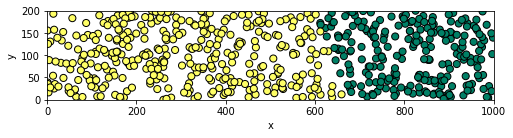

In [135]:
import matplotlib.pyplot as plt

n_lettuce = 600
x_ltc = np.random.uniform(0, 1000, n_lettuce)
y_ltc = np.random.uniform(0, 200, n_lettuce)
has_grown = ( 3*x_ltc + y_ltc - 2000 > 0 ).astype(int)
np.savez('lettuce.npz', x=x_ltc, y=y_ltc, z=has_grown)

plt.figure(figsize=(8,4))
plt.axes(aspect=1, xlim=(0, 1000), ylim=(0,200), xlabel='x',
        ylabel='y')
plt.scatter(x_ltc, y_ltc, c=has_grown, lw=1,
           edgecolor='k', cmap='summer_r', s=50)
plt.show()

# Use LogisticReg to classify Good / Bad Lettuce

In [141]:
from sklearn.preprocessing import StandardScaler

class LogisticRegression:
    def __init__(self, eta):
        self.eta = eta
    def learn(self, X, z, n_learns):
        self.sse = []
        self.correct_prediction = []
        # np.zeros like, [0,0,0]
        self.w = np.zeros(X.shape[1] + 1) # +1 is represented as w_0
        self.scaler = StandardScaler()
        
        X = self.scaler.fit_transform(X)
        phi = self.cal_sigmoid(X)
        for i in range(n_learns):
            eee = 2 * phi * (1-phi) * (z-phi)
            self.w[1:] += np.dot(X.T, eee) * self.eta
            self.w[0] +=eee.sum() * self.eta
            phi = self.cal_sigmoid(X)
            is_true = np.abs(phi-z) < 0.5
            self.correct_prediction += [ is_true.sum()]
            self.sse += [self.cal_sse(X, z)]
            
        self.w[1:] /= self.scaler.scale_
        self.w[0] -= (self.w[1:] * self.scaler.mean_).sum()
    def predict(self, X):
        return self.cal_sigmoid(X) > 0.5
    def cal_sigmoid(self, X):
        def sigmoid(x):
            return 1/(1+np.exp(-x))
        return sigmoid(np.dot(X, self.w[1:]) + self.w[0])
    def cal_sse(self, X, z):
        return ((z-self.cal_sigmoid(X)) ** 2).sum()



In [137]:
xy_ltc = np.stack([x_ltc, y_ltc], axis=1)

model = LogisticRegression(eta=0.00001)
model.learn(xy_ltc, has_grown, n_learns=30000)
print('ได้สมการเส้นแบ่งเขตเป็น %.3fx%+.3fy%+.3f = 0'%(model.w[1],model.w[2],model.w[0]))
print('ทายถูกทั้งหมด %d จาก %d'%(model.correct_prediction[-1],
                                 len(has_grown)))
        
        

ได้สมการเส้นแบ่งเขตเป็น 0.013x+0.005y-8.185 = 0
ทายถูกทั้งหมด 593 จาก 600


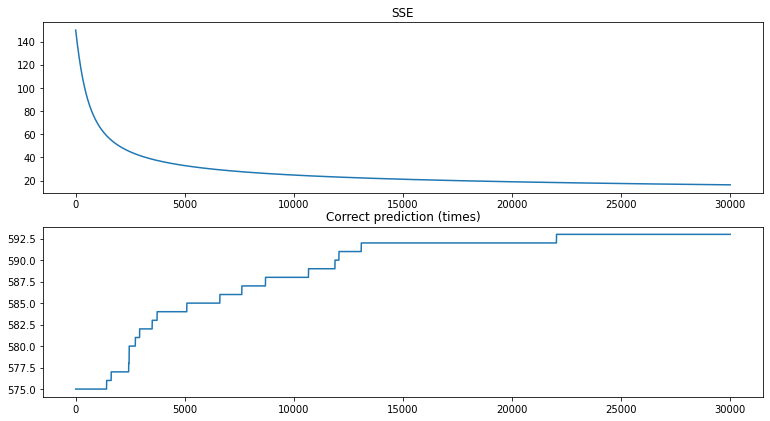

In [138]:
plt.figure(figsize=(10,4))
ax = plt.subplot(211)
ax.set_title('SSE')
plt.plot(model.sse)

ax = plt.subplot(212)
ax.set_title('Correct prediction (times)')
plt.plot(model.correct_prediction)

plt.subplots_adjust(0,0,1,1.3)
plt.show()

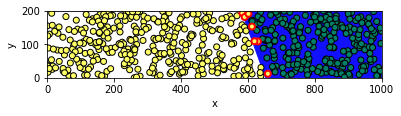

ทายถูกทั้งหมด 593 จาก 1000


In [139]:
x_lines = np.array([0, 1000])
y_lines = -(model.w[0] + model.w[1] * x_lines) / model.w[2]

has_pred_true = model.predict(xy_ltc) == has_grown

plt.axes(aspect=1, xlim=(0,1000), ylim=(0,200), xlabel='x', ylabel='y')
if (model.w[1] * model.w[2] < 0 ):
    plt.fill_between(x_lines, y_lines, color='#33ee33')
else:
    plt.fill_between(x_lines, y_lines,[200,200], color='#1111ff') 
    
plt.scatter(x_ltc[has_pred_true==1], y_ltc[has_pred_true==1], c=has_grown[has_pred_true==1],
           edgecolors='k', cmap='summer_r')
plt.scatter(x_ltc[has_pred_true==0], y_ltc[has_pred_true==0], c=has_grown[has_pred_true==0],
           edgecolors='r', cmap='summer_r', lw=2)

plt.show() 
print('ทายถูกทั้งหมด %d จาก 1000'%has_pred_true.sum())

# Use Scaler to overcome this problem

ได้สมการเส้นแบ่งเขตเป็น 5.47121x+0.39176y-1.99544 = 0
ทายถูกทั้งหมด 596 จาก 600


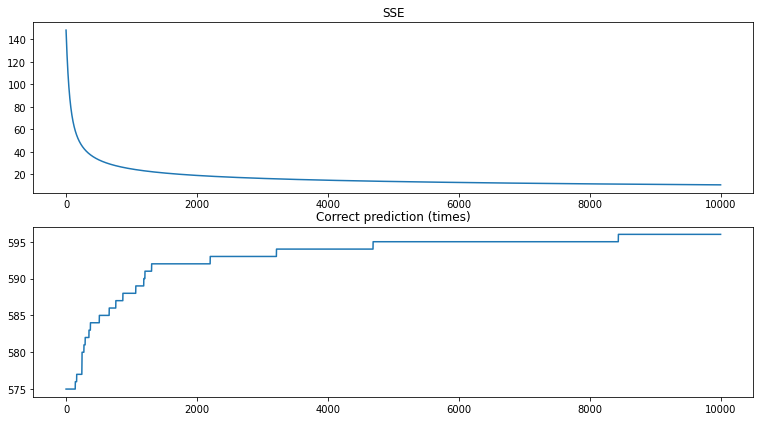

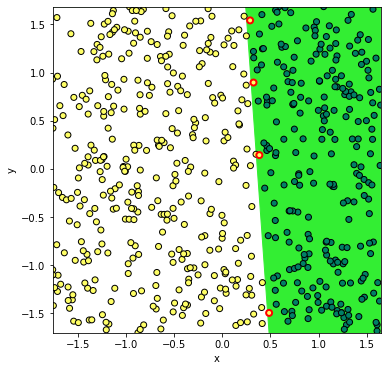

In [140]:
data = np.load('lettuce.npz')
x_ltc = data['x']
y_ltc = data['y']
has_grown = data['z']
xy_ltc = np.stack([x_ltc, y_ltc], 1)

scaler = StandardScaler()
xy_ltc_stan = scaler.fit_transform(xy_ltc)
M = LogisticRegression(eta=0.0001)
M.learn(xy_ltc_stan, has_grown, n_learns=10000)

print('ได้สมการเส้นแบ่งเขตเป็น %.5fx%+.5fy%+.5f = 0'%(M.w[1],M.w[2],M.w[0]))
print('ทายถูกทั้งหมด %d จาก %d'%(M.correct_prediction[-1],len(has_grown)))


# SSE & correct prediction ===========================================
plt.figure(figsize=(10,4))
ax = plt.subplot(211)
ax.set_title('SSE')
plt.plot(M.sse)

ax = plt.subplot(212)
ax.set_title('Correct prediction (times)')
plt.plot(M.correct_prediction)

plt.subplots_adjust(0,0,1,1.3)

# Plot Viz =========================================================
x_ltc_stan = xy_ltc_stan[:,0]
y_ltc_stan = xy_ltc_stan[:,1]

x_lines = np.array([x_ltc_stan.min(), x_ltc_stan.max()])
y_lines = -(M.w[0] + M.w[1] * x_lines) / M.w[2]

has_pred_true = M.predict(xy_ltc_stan) == has_grown


plt.figure(figsize=(6,6))
plt.axes(aspect=1,
         xlim=(x_ltc_stan.min(), x_ltc_stan.max()),
         ylim=(y_ltc_stan.min(), y_ltc_stan.max()),
         xlabel='x', ylabel='y')


if (M.w[1] * M.w[2] < 0 ):
    plt.fill_between(x_lines, y_lines, 
                     [y_ltc_stan.min(), y_ltc_stan.min()]
                     , color='#33ee33')
else:
    plt.fill_between(x_lines, y_lines, 
                     [y_ltc_stan.max(), y_ltc_stan.max()]
                     , color='#33ee33') 
    
plt.scatter(x_ltc_stan[has_pred_true==1], y_ltc_stan[has_pred_true==1], c=has_grown[has_pred_true==1],
           edgecolors='k', cmap='summer_r')
plt.scatter(x_ltc_stan[has_pred_true==0], y_ltc_stan[has_pred_true==0], c=has_grown[has_pred_true==0],
           edgecolors='r', cmap='summer_r', lw=2)

plt.show()

# Add Standardize features to Class

In [141]:
from sklearn.preprocessing import StandardScaler

class LogisticRegression:
    def __init__(self, eta):
        self.eta = eta
    def learn(self, X, z, n_learns):
        self.sse = []
        self.correct_prediction = []
        # np.zeros like, [0,0,0]
        self.w = np.zeros(X.shape[1] + 1) # +1 is represented as w_0
        self.scaler = StandardScaler()
        
        X = self.scaler.fit_transform(X)
        phi = self.cal_sigmoid(X)
        for i in range(n_learns):
            eee = 2 * phi * (1-phi) * (z-phi)
            self.w[1:] += np.dot(X.T, eee) * self.eta
            self.w[0] +=eee.sum() * self.eta
            phi = self.cal_sigmoid(X)
            is_true = np.abs(phi-z) < 0.5
            self.correct_prediction += [ is_true.sum()]
            self.sse += [self.cal_sse(X, z)]
            
        self.w[1:] /= self.scaler.scale_
        self.w[0] -= (self.w[1:] * self.scaler.mean_).sum()
    def predict(self, X):
        return self.cal_sigmoid(X) > 0.5
    def cal_sigmoid(self, X):
        def sigmoid(x):
            return 1/(1+np.exp(-x))
        return sigmoid(np.dot(X, self.w[1:]) + self.w[0])
    def cal_sse(self, X, z):
        return ((z-self.cal_sigmoid(X)) ** 2).sum()



In [142]:
data = np.load('lettuce.npz')
x_ltc = data['x']
y_ltc = data['y']
has_grown = data['z']
xy_ltc = np.stack([x_ltc, y_ltc], 1)

M = LogisticRegression(eta=0.0001)
M.learn(xy_ltc, has_grown, n_learns=10000)

print('ได้สมการเส้นแบ่งเขตเป็น %.5fx%+.5fy%+.5f = 0'%(M.w[1],M.w[2],M.w[0]))
print('ทายถูกทั้งหมด %d จาก %d'%(M.correct_prediction[-1],len(has_grown)))


ได้สมการเส้นแบ่งเขตเป็น 0.01867x+0.00665y-12.30460 = 0
ทายถูกทั้งหมด 596 จาก 600


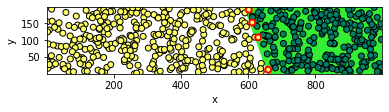

In [143]:
x_lines = np.array([x_ltc.min(), x_ltc.max()])
y_lines = -(M.w[0] + M.w[1] * x_lines) / M.w[2]
has_pred_true = M.predict(xy_ltc) == has_grown

plt.figure(figsize=(6,6))
plt.axes(aspect=1,
         xlim=(x_ltc.min(), x_ltc.max()),
         ylim=(y_ltc.min(), y_ltc.max()),
         xlabel='x', ylabel='y')

if (M.w[1] * M.w[2] < 0 ):
    plt.fill_between(x_lines, y_lines, 
                     [y_ltc.min(), y_ltc.min()]
                     , color='#33ee33')
else:
    plt.fill_between(x_lines, y_lines, 
                     [y_ltc.max(), y_ltc.max()]
                     , color='#33ee33') 
    
plt.scatter(x_ltc[has_pred_true==1], y_ltc[has_pred_true==1], c=has_grown[has_pred_true==1],
           edgecolors='k', cmap='summer_r')
plt.scatter(x_ltc[has_pred_true==0], y_ltc[has_pred_true==0], c=has_grown[has_pred_true==0],
           edgecolors='r', cmap='summer_r', lw=2)

plt.show()